#Installing Required Packages

This command installs or updates the specified Python packages quietly (without showing detailed output). It ensures that the latest versions of torch, yolo5, and sahi are installed.


In [ ]:
%pip install -qU torch yolo5 sahi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 755.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.3/872.3 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00
  

In [ ]:
import os
os.getcwd()

'/content'

#Integrating Roboflow with YOLOv5

In this section, the Roboflow library is used to streamline the dataset management process for YOLOv5. The code initializes a connection to the Roboflow platform using an API key, allowing for seamless integration and easy dataset access.

In [ ]:
%pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="AwiSMZX6j2EsrqGDJ779", model_format="yolov5", notebook="roboflow-yolov5")

In [ ]:
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
project = rf.workspace("workplace-okrhe").project("internship-object-detection")
version = project.version(2)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/internship-object-detection-2 in yolov5pytorch:: 100%|██████████| 11391/11391 [00:03<00:00, 3011.93it/s]


#Importing Required Functions and Classes

This section imports functions and classes necessary for using the sahi library for object detection, image handling, and file operations. Additionally, it imports the Image class from IPython.display for displaying images in the notebook.

In [ ]:
#import required funcions and classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict

from IPython.display import Image

#Mounting Google Drive

This section of the code mounts your Google Drive to the Colab environment. This allows you to access files stored in your Google Drive directly from your Colab notebook, making it easier to work with datasets, save outputs, and manage files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Setting Up Model Directory and Copying Model Weights

This section creates a directory to store models and copies a pre-trained model weights file from Google Drive to the newly created directory. This setup is essential for organizing and accessing model files during the notebook execution.

In [ ]:
!mkdir -p /content/models
!cp /content/drive/MyDrive/training/best.pt /content/models/

In [ ]:
yolov5_model_path = "models/best.pt"

#Loading a Pre-trained YOLOv5 Model for Detection

This code snippet initializes a detection model using the AutoDetectionModel class from the sahi library. It loads a pre-trained YOLOv5 model with specified parameters, including confidence threshold and device settings.

In [ ]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type="yolov5",
    model_path=yolov5_model_path,
    confidence_threshold=0.3,
    device="cpu",
)

#Making Predictions on an Image

This code snippet uses the get_prediction function to perform object detection on a specified image using the pre-trained YOLOv5 model. The image is read from the file system, and the detection results are stored in the result variable.

In [ ]:
result = get_prediction(read_image('/content/datasets/internship-object-detection-2/valid/images/tile_1_0_4_frames_16_jpg.rf.ac4838cee022483e0873a13bf08fb98d.jpg'), detection_model)

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


In [ ]:
print(result.to_coco_annotations())

[{'image_id': None, 'bbox': [315.2791442871094, 560.0941772460938, 29.486083984375, 36.56201171875], 'score': 0.7901297211647034, 'category_id': 0, 'category_name': '0', 'segmentation': [], 'iscrowd': 0, 'area': 1078}, {'image_id': None, 'bbox': [489.2711486816406, 530.8207397460938, 26.278961181640625, 39.218994140625], 'score': 0.780072808265686, 'category_id': 0, 'category_name': '0', 'segmentation': [], 'iscrowd': 0, 'area': 1030}, {'image_id': None, 'bbox': [490.2632751464844, 111.633056640625, 29.894927978515625, 40.466796875], 'score': 0.7636345028877258, 'category_id': 0, 'category_name': '0', 'segmentation': [], 'iscrowd': 0, 'area': 1209}, {'image_id': None, 'bbox': [586.71533203125, 361.79241943359375, 21.5430908203125, 37.55035400390625], 'score': 0.7541965246200562, 'category_id': 0, 'category_name': '0', 'segmentation': [], 'iscrowd': 0, 'area': 808}, {'image_id': None, 'bbox': [201.0516815185547, 584.6441650390625, 22.1412353515625, 42.3204345703125], 'score': 0.75172144

In [ ]:
!mkdir -p demo_data

#Exporting and Displaying Detection Results

This code snippet exports the visual representation of the detection results to a specified directory and then displays the exported image. This allows you to view the results of the object detection visually.

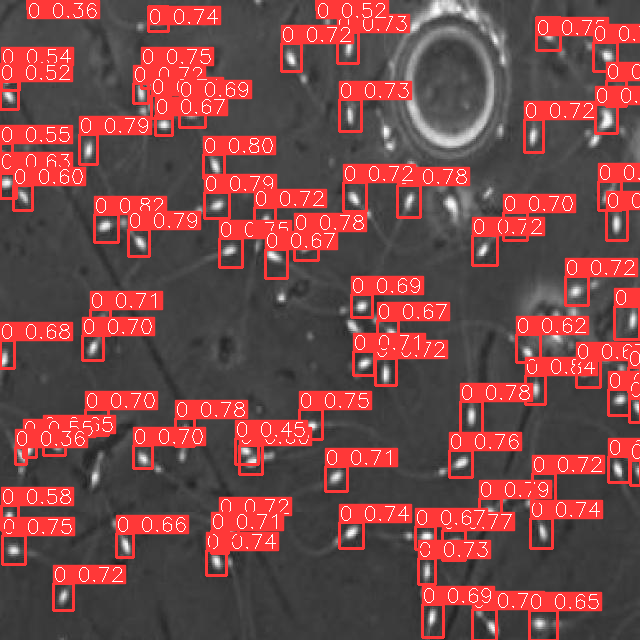

In [ ]:
result.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")

#Performing Sliced Object Detection

This code snippet uses the get_sliced_prediction function to perform object detection on an image by dividing it into smaller slices. This approach is useful for handling large images that may not fit into memory all at once.

In [ ]:
result = get_sliced_prediction(
    '/content/datasets/internship-object-detection-2/valid/images/tile_1_0_4_frames_16_jpg.rf.ac4838cee022483e0873a13bf08fb98d.jpg',
    detection_model,
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2)

Performing prediction on 9 slices.


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(arg

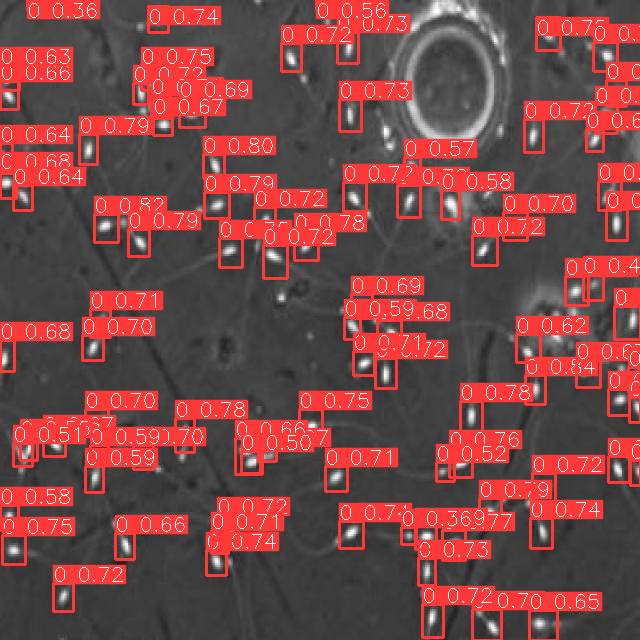

In [ ]:
result.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")